In [5]:
# 数据操作和处理
import pandas as pd
import numpy as np

# 数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

# 使图表在Notebook内显示
%matplotlib inline

# 使用 macOS 默认中文字体（优先苹方），避免中文显示为方块
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Heiti TC', 'Hiragino Sans GB', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 使用pandas读取CSV文件
df = pd.read_csv("Pokemon.csv")

# 查看数据的基本信息（前5行）
print("数据形状（行数，列数）:", df.shape)
df.head()

数据形状（行数，列数）: (810, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE


In [6]:
# 查看最后几行数据，确认问题
print("原始数据最后5行：")
df.tail()

原始数据最后5行：


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
805,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE
806,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
807,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [7]:
# 删除最后四行（使用.iloc按位置索引）
df_cleaned = df.iloc[:-4].copy()

# 再次检查数据形状和最后几行，确认删除成功
print("删除后数据形状:", df_cleaned.shape)
df_cleaned.tail()

删除后数据形状: (806, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
801,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,TRUE
802,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,TRUE
803,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
804,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE
805,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE


In [8]:
# 查看 Type 2 列的所有唯一值，看看有什么异常
print("Type 2 的唯一值：")
print(df_cleaned['Type 2'].unique())

Type 2 的唯一值：
['Poison' nan 'Flying' 'Dragon' '0' 'Ground' '273' 'Fairy' 'Grass'
 'Fighting' 'Psychic' 'Steel' 'Ice' 'A' 'Rock' 'Dark' 'Water' 'Electric'
 'Fire' 'Ghost' 'Bug' 'BBB' 'Normal']


In [9]:
# 将 Type 2 列中的异常值替换为 NaN
abnormal_values = ['0', '273', 'A', 'BBB']

print(f"替换前 Type 2 为异常值的行数: {df_cleaned['Type 2'].isin(abnormal_values).sum()}")

# 将异常值替换为 NaN
df_cleaned['Type 2'] = df_cleaned['Type 2'].replace(abnormal_values, np.nan)

print(f"替换后 Type 2 为异常值的行数: {df_cleaned['Type 2'].isin(abnormal_values).sum()}")

# 再次检查唯一值，确认替换成功
print("清理后 Type 2 的唯一值：")
print(df_cleaned['Type 2'].unique())

# 查看 Type 2 列的缺失值情况
print(f"\nType 2 列的缺失值数量: {df_cleaned['Type 2'].isna().sum()}")
print("Type 2 列的值分布：")
print(df_cleaned['Type 2'].value_counts(dropna=False))

替换前 Type 2 为异常值的行数: 4
替换后 Type 2 为异常值的行数: 0
清理后 Type 2 的唯一值：
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']

Type 2 列的缺失值数量: 388
Type 2 列的值分布：
Type 2
NaN         388
Flying       98
Poison       37
Ground       35
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64


In [10]:
# 检查是否有完全重复的行
duplicates = df_cleaned.duplicated()
print(f"完全重复的行数: {duplicates.sum()}")

if duplicates.sum() > 0:
    print("重复的行如下：")
    print(df_cleaned[duplicates])
    # 删除重复行
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"删除重复行后的数据形状: {df_cleaned.shape}")
else:
    print("没有发现完全重复的行。")

完全重复的行数: 5
重复的行如下：
       #       Name  Type 1  Type 2 Total  HP Attack Defense Sp. Atk Sp. Def  \
15    11    Metapod     Bug     NaN   205  50     20      55      25      25   
23    17  Pidgeotto  Normal  Flying   349  63     60      55      50      50   
185  168    Ariados     Bug  Poison   390  70     90      70      60      60   
186  168    Ariados     Bug  Poison   390  70     90      70      60      60   
187  168    Ariados     Bug  Poison   390  70     90      70      60      60   

    Speed Generation Legendary  
15     30          1     FALSE  
23     71          1     FALSE  
185    40          2     FALSE  
186    40          2     FALSE  
187    40          2     FALSE  
删除重复行后的数据形状: (801, 13)


In [11]:
# 首先检查 Attack 列的数据类型
print("Attack 列的数据类型:", df_cleaned['Attack'].dtype)
print("Attack 列的前几个值:")
print(df_cleaned['Attack'].head(10))

# 检查是否有非数值内容
print("\nAttack 列的唯一值示例:")
print(df_cleaned['Attack'].unique()[:20])  # 查看前20个唯一值

Attack 列的数据类型: object
Attack 列的前几个值:
0     49
1     62
2     82
3    100
4     52
5     64
6     84
7    130
8    104
9    840
Name: Attack, dtype: object

Attack 列的唯一值示例:
['49' '62' '82' '100' '52' '64' '84' '130' '104' '840' '63' '83' '103'
 '30' '20' '45' '35' '25' '90' '150']


In [12]:
# 将 Attack 列从字符串转换为数值类型
df_cleaned['Attack'] = pd.to_numeric(df_cleaned['Attack'], errors='coerce')

# 检查转换后的结果
print("转换后 Attack 列的数据类型:", df_cleaned['Attack'].dtype)
print("转换后 Attack 列的描述性统计:")
print(df_cleaned['Attack'].describe())

# 检查是否有缺失值（即无法转换的值）
missing_attack = df_cleaned['Attack'].isna().sum()
print(f"转换后产生的缺失值数量: {missing_attack}")

if missing_attack > 0:
    print("包含缺失 Attack 值的行:")
    print(df_cleaned[df_cleaned['Attack'].isna()][['Name', 'Attack']])

转换后 Attack 列的数据类型: float64
转换后 Attack 列的描述性统计:
count     800.000000
mean       81.095000
std        53.245327
min         5.000000
25%        55.000000
50%        75.000000
75%       100.000000
max      1000.000000
Name: Attack, dtype: float64
转换后产生的缺失值数量: 1
包含缺失 Attack 值的行:
    Name  Attack
408  NaN     NaN


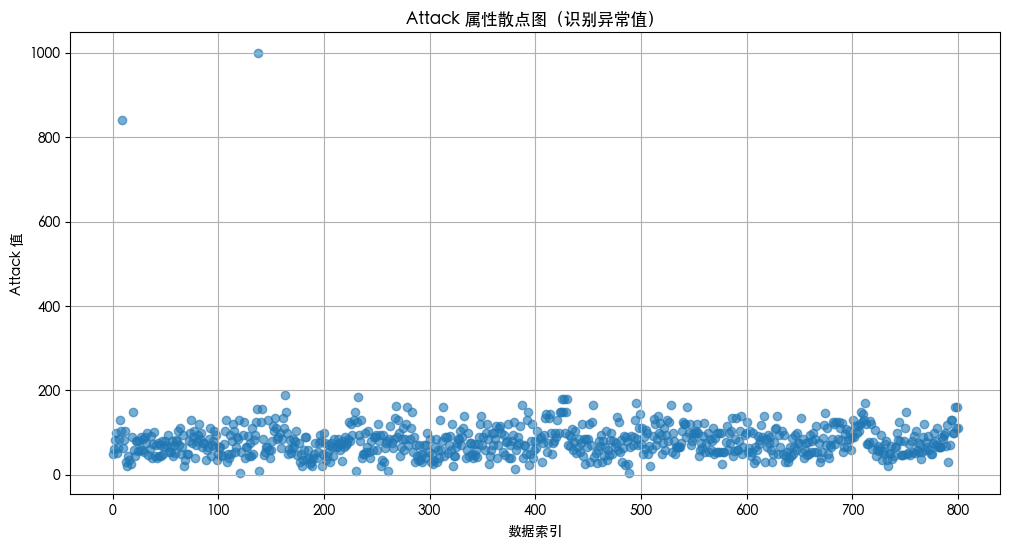

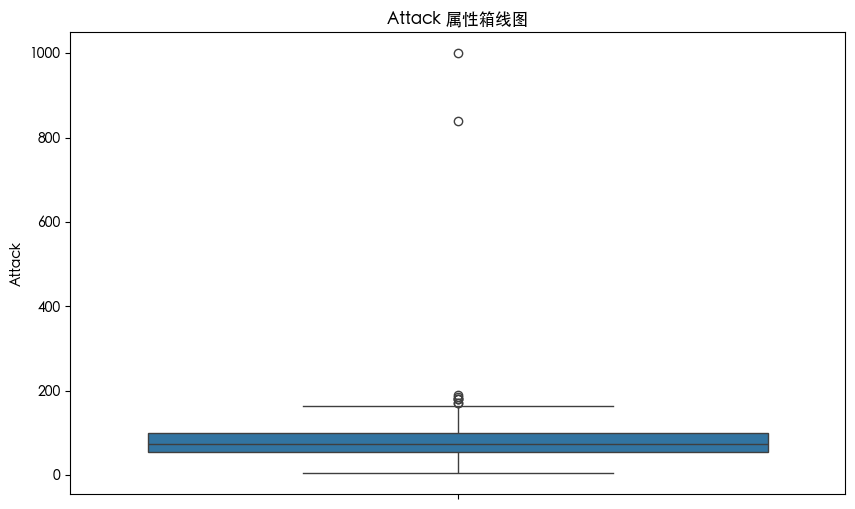

Attack 属性的描述性统计:
count     800.000000
mean       81.095000
std        53.245327
min         5.000000
25%        55.000000
50%        75.000000
75%       100.000000
max      1000.000000
Name: Attack, dtype: float64

Q1 (25%分位数): 55.0
Q3 (75%分位数): 100.0
IQR: 45.0
异常值下界 (Q1 - 1.5*IQR): -12.5
异常值上界 (Q3 + 1.5*IQR): 167.5

Attack属性异常高的宝可梦有 9 个：
                        Name  Attack
9                   Squirtle   840.0
140                   Tauros  1000.0
165      MewtwoMega Mewtwo X   190.0
237  HeracrossMega Heracross   185.0
430    GroudonPrimal Groudon   180.0
432    RayquazaMega Rayquaza   180.0
435       DeoxysAttack Forme   180.0
500    GarchompMega Garchomp   170.0
717       KyuremBlack Kyurem   170.0

特别高的异常值 (840):
       Name  Attack  HP Defense Type 1 Type 2
9  Squirtle   840.0  44      65  Water    NaN


In [14]:
# 使用散点图可视化Attack属性
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df_cleaned)), df_cleaned['Attack'], alpha=0.6)
plt.xlabel('数据索引')
plt.ylabel('Attack 值')
plt.title('Attack 属性散点图（识别异常值）')
plt.grid(True)
plt.show()

# 使用箱线图可视化
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, y='Attack')
plt.title('Attack 属性箱线图')
plt.show()

# 使用描述性统计查看分布
print("Attack 属性的描述性统计:")
print(df_cleaned['Attack'].describe())

# 使用IQR法则识别异常值
Q1 = df_cleaned['Attack'].quantile(0.25)
Q3 = df_cleaned['Attack'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nQ1 (25%分位数): {Q1}")
print(f"Q3 (75%分位数): {Q3}")
print(f"IQR: {IQR}")
print(f"异常值下界 (Q1 - 1.5*IQR): {lower_bound}")
print(f"异常值上界 (Q3 + 1.5*IQR): {upper_bound}")

# 找出Attack值大于上界的异常值
attack_outliers = df_cleaned[df_cleaned['Attack'] > upper_bound]
print(f"\nAttack属性异常高的宝可梦有 {len(attack_outliers)} 个：")
print(attack_outliers[['Name', 'Attack']])

# 特别关注那个极高的值840
if 840 in df_cleaned['Attack'].values:
    extreme_outlier = df_cleaned[df_cleaned['Attack'] == 840]
    print(f"\n特别高的异常值 (840):")
    print(extreme_outlier[['Name', 'Attack', 'HP', 'Defense', 'Type 1', 'Type 2']])

处理前 Attack 的最大值: 1000.0
处理前 Attack 的异常值数量: 9
处理后 Attack 的最大值: 167.5
处理后 Attack 的异常值数量: 0


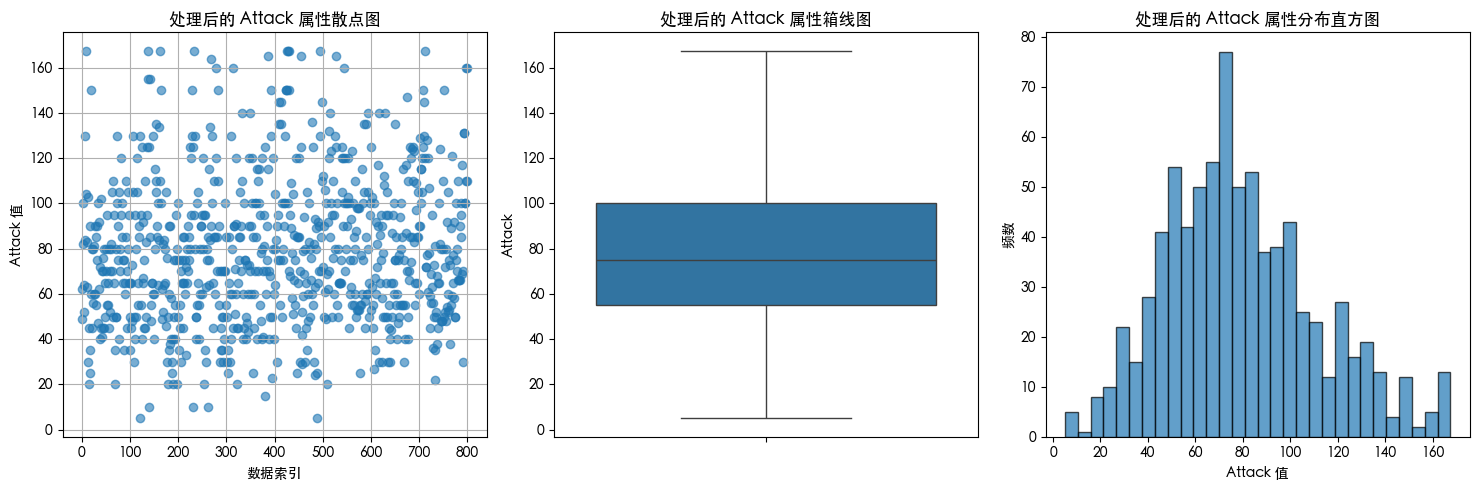


处理后的 Attack 属性描述性统计:
count    800.000000
mean      79.110625
std       32.445670
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      167.500000
Name: Attack, dtype: float64


In [15]:
# 处理异常值 - 使用盖帽法
print(f"处理前 Attack 的最大值: {df_cleaned['Attack'].max()}")
print(f"处理前 Attack 的异常值数量: {len(attack_outliers)}")

# 将异常值设定为上限值
df_cleaned['Attack'] = np.where(df_cleaned['Attack'] > upper_bound, upper_bound, df_cleaned['Attack'])

print(f"处理后 Attack 的最大值: {df_cleaned['Attack'].max()}")

# 验证处理结果
new_attack_outliers = df_cleaned[df_cleaned['Attack'] > upper_bound]
print(f"处理后 Attack 的异常值数量: {len(new_attack_outliers)}")

# 再次可视化，确认异常值已被处理
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(range(len(df_cleaned)), df_cleaned['Attack'], alpha=0.6)
plt.xlabel('数据索引')
plt.ylabel('Attack 值')
plt.title('处理后的 Attack 属性散点图')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.boxplot(data=df_cleaned, y='Attack')
plt.title('处理后的 Attack 属性箱线图')

plt.subplot(1, 3, 3)
plt.hist(df_cleaned['Attack'], bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Attack 值')
plt.ylabel('频数')
plt.title('处理后的 Attack 属性分布直方图')

plt.tight_layout()
plt.show()

# 显示处理后的统计信息
print("\n处理后的 Attack 属性描述性统计:")
print(df_cleaned['Attack'].describe())

In [18]:
# 首先检查这两列的数据类型和内容（不排序）
print("Generation 列的数据类型:", df_cleaned['Generation'].dtype)
print("Generation 列的所有唯一值:")
print(df_cleaned['Generation'].unique())

print("\nLegendary 列的数据类型:", df_cleaned['Legendary'].dtype)
print("Legendary 列的所有唯一值:")
print(df_cleaned['Legendary'].unique())

Generation 列的数据类型: object
Generation 列的所有唯一值:
['1' 'FALSE' '2' '3' nan '4' '5' '6' 'undefined']

Legendary 列的数据类型: object
Legendary 列的所有唯一值:
['FALSE' '1' '0' nan 'Poison' 'Ground' 'TRUE']


In [23]:
# 方法：查找Legendary列中包含数字的数据
# 先将Legendary列转换为字符串
df_cleaned['Legendary_str'] = df_cleaned['Legendary'].astype(str)

# 查找Legendary列中的数字值
legendary_issues = df_cleaned[df_cleaned['Legendary_str'].str.isdigit()]
if len(legendary_issues) > 0:
    print(legendary_issues[['Name', 'Generation', 'Legendary']])
    
    # 将legendary_issues作为suspect_rows
    suspect_rows = legendary_issues
    
    # 如果找到了疑似错误的数据，交换Generation和Legendary的值
    print(f"找到了 {len(suspect_rows)} 条疑似错误数据，准备交换属性值...")
    
    # 获取这些行的索引
    suspect_indexes = suspect_rows.index
    
    # 显示交换前的值
    print("\n交换前的数据:")
    print(df_cleaned.loc[suspect_indexes, ['Name', 'Generation', 'Legendary']])
    
    # 交换Generation和Legendary的值
    temp_gen = df_cleaned.loc[suspect_indexes, 'Generation'].copy()
    df_cleaned.loc[suspect_indexes, 'Generation'] = df_cleaned.loc[suspect_indexes, 'Legendary']
    df_cleaned.loc[suspect_indexes, 'Legendary'] = temp_gen
    
    # 显示交换后的值
    print("\n交换后的数据:")
    print(df_cleaned.loc[suspect_indexes, ['Name', 'Generation', 'Legendary']])
    
    print("\n属性交换完成！")
    
else:
    print("未发现Legendary列包含数字值的数据，未需要交换属性的数据。")

          Name Generation Legendary
11   Blastoise      FALSE         1
32     Pikachu      FALSE         0
45   Ninetales          1         0
130    Seaking          1         0
找到了 4 条疑似错误数据，准备交换属性值...

交换前的数据:
          Name Generation Legendary
11   Blastoise      FALSE         1
32     Pikachu      FALSE         0
45   Ninetales          1         0
130    Seaking          1         0

交换后的数据:
          Name Generation Legendary
11   Blastoise          1     FALSE
32     Pikachu          0     FALSE
45   Ninetales          0         1
130    Seaking          0         1

属性交换完成！


In [25]:
# 删除Legendary和Generation列中为数字的行
df_cleaned['Generation'] = pd.to_numeric(df_cleaned['Generation'], errors='coerce')
df_cleaned['Legendary'] = pd.to_numeric(df_cleaned['Legendary'], errors='coerce')

# 删除Legendary和Generation列中为数字的项
df_cleaned = df_cleaned.dropna(subset=['Generation', 'Legendary'])

print("\n处理后的数据（去除数字项）：")
print(df_cleaned[['Name', 'Generation', 'Legendary']])



处理后的数据（去除数字项）：
          Name  Generation  Legendary
45   Ninetales         0.0        1.0
130    Seaking         0.0        1.0
